Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.50      0.43        10
           1       0.50      0.38      0.43        13

    accuracy                           0.43        23
   macro avg       0.44      0.44      0.43        23
weighted avg       0.45      0.43      0.43        23

Accuracy Score: 0.43478260869565216


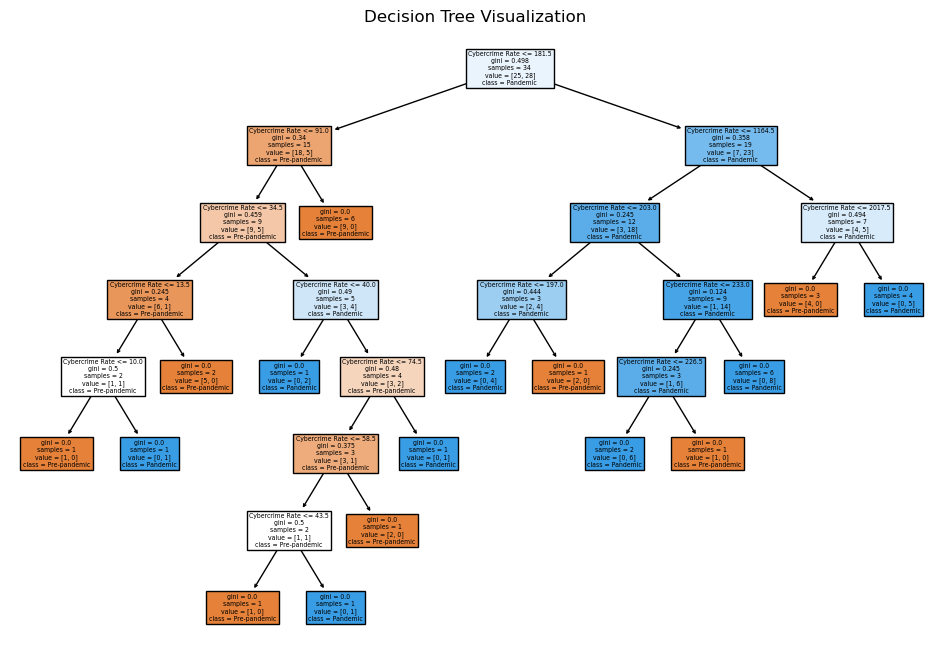

<Figure size 1400x600 with 0 Axes>

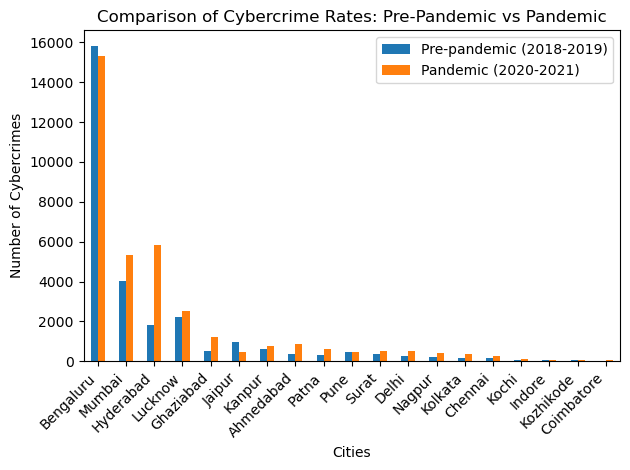

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load dataset safely
file_path = r"C:\Users\91944\Desktop\Research\Crime\All datasets\cyber-crimes-from-ncrb-master-data-year-state-and-city-wise-total-number-of-cyber-crimes-committed-in-india.csv"
try:
    data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()
except Exception as e:
    print(f"Error loading CSV: {e}")
    exit()

# Data Preprocessing
filtered_data = data[data['year'].isin([2018, 2019, 2020, 2021])].copy()
filtered_data['pandemic_period'] = filtered_data['year'].apply(lambda x: 1 if x in [2020, 2021] else 0)
filtered_data = filtered_data.dropna(subset=['city', 'value'])
filtered_data = filtered_data[['year', 'state', 'city', 'value', 'pandemic_period']]
filtered_data = filtered_data[filtered_data['city'] != 'Total Cities']

# Prepare data for Random Forest
X = filtered_data[['value']]
y = filtered_data['pandemic_period']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf_model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Plot Decision Tree
plt.figure(figsize=(12, 8))
try:
    plot_tree(rf_model.estimators_[0], feature_names=['Cybercrime Rate'], class_names=['Pre-pandemic', 'Pandemic'], filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()  # Display instead of saving
except Exception as e:
    print(f"Error during Decision Tree visualization: {e}")

# Bar chart visualization
pre_pandemic = filtered_data[filtered_data['pandemic_period'] == 0].groupby('city')['value'].sum()
pandemic = filtered_data[filtered_data['pandemic_period'] == 1].groupby('city')['value'].sum()

combined_data = pd.DataFrame({'Pre-pandemic (2018-2019)': pre_pandemic, 'Pandemic (2020-2021)': pandemic})
combined_data['Total'] = combined_data.sum(axis=1)
combined_data = combined_data.sort_values(by='Total', ascending=False).drop('Total', axis=1)

plt.figure(figsize=(14, 6))
combined_data.plot(kind='bar')
plt.title('Comparison of Cybercrime Rates: Pre-Pandemic vs Pandemic')
plt.xlabel('Cities')
plt.ylabel('Number of Cybercrimes')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()  # Display the bar chart instead of saving